# Multilayer Perceptrons with Auto-differentiation!
![](http://cs231n.github.io/assets/nn1/neural_net.jpeg)

* Today we will (again) train a multilayer perceptron!
    Differently from the last tutorial we will let the PyTorch library do most of the complicated work for us.

* The goal of this notebook is therefore to get you familiar with what can considered as a general PyTorch cooking recipe, which we will re-use in the coming weeks.

* We will be training a multilayer perceptron on the CIFAR-10 dataset, a popular dataset of images that is used in Computer-Vision (CV) research


In [42]:
import numpy as np
import torch, torchvision
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
from matplotlib import pyplot as plt 

## 1. Load the dataset

* PyTorch has the nice advantage of providing us with popular CV datasets that can be easily downloaded.
    The following script will download the CIFAR-10 dataset for you.
    
* Since it is computationally very expensive to load the entire dataset into memory at training time, you will have to look into PyTorch's dataloaders. 

In [43]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root = "./data", train = True, download = True, transform = transform)
testset = datasets.CIFAR10(root = "./data", train = False, download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=False,num_workers=2)

testloader =  torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

classes = ('airplane', 'automobile', 'bird', 'cat', 
          'deer','dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Visualize the Images of CIFAR-10

* Once everything is properly loaded you should be able to visualize some of the samples of the CIFAR-10

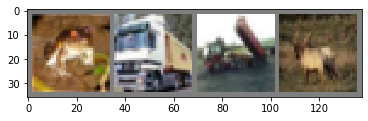

 frog truck truck  deer


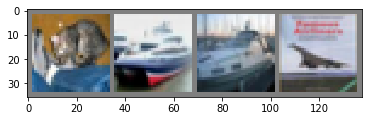

  cat  ship  ship airplane


In [44]:
def show_images(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
show_images(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

dataiter = iter(testloader)
images, labels = dataiter.next()
show_images(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


## 2. Creating a MLP model and train it

We are now ready to define all the necessary hyperparameters that are required to construct a proper MLP.
Similarly to last week's tutorial explore the data carefully in order to know how to set the following parameters!

### Hyperparameters

In [53]:
input_dim = 32 * 32 * 3
hidden_dim = 50
output_dim = 10
learning_rate = 1e-3
num_epochs = 1

### Computation Graph

You are free to define any kind of architecture that you think is reasonable for the problem of classifying CIFAR-10 images. The constructor of the neural network will represent the different components of the computation-graph, note that it is very similar to the way we have programmed our own neural network last week.
You will also have to define the forward pass yourself.

In [55]:
class net(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super(net, self).__init__()
        self.input_dim = n_input
        self.fc1 = nn.Linear(n_input, n_hidden)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden, n_output)

                
    def forward(self, x):
        x = x.view(x.size(0), self.input_dim)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
        
        

### Create the Network

You are now ready to create your neural network object. You will also have to define an appropriate loss function to minimize and an optimization algorithm.

In [56]:
model = net(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

### Train the Network

Once you have your neural network you just need to train it. You will have to compute the output of the forward pass, compare it to your desired output and update the parameters of the network by backpropagation. Fortunately for you this week this only requires less than 5 lines of code in PyTorch!

In [59]:
def train(num_epochs):
    for i in range(num_epochs):
        tmp_loss = []
        for(x, y) in trainloader:
            outputs = model(x)
            loss = criterion(outputs, y)
            tmp_loss.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        print("Loss al {}th epoch: {}".format(i, np.mean(tmp_loss)))   

In [65]:
train(5)

Loss al 0th epoch: 1.565942381620407
Loss al 1th epoch: 1.5405638983488084
Loss al 2th epoch: 1.5189557493278385
Loss al 3th epoch: 1.50574227340281
Loss al 4th epoch: 1.4986892818629742


## 3. Evaluate the final performance of the Network

Lastly once you think your network is properly trained it will be time to test its performance on the testing-set of the CIFAR-10 dataset. Compute the final accuracy of your model.

In [63]:
def test():
    with torch.no_grad():
        ok = 0
        total = 0
        for inputs, targets in testloader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            ok += predicted.eq(targets).sum().item()
            
        print('Accuracy on testing images: %d %%' % (100*ok/total))
    

In [66]:
test()

Accuracy on testing images: 45 %
